In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
TYPE = "xT" ##xT/EPV
if TYPE == "xT":    
    with open("expected_threat.json", "r") as f:
        xtd = json.load(f) 
    xtd = np.array(xtd)
elif TYPE == "EPV":
    xtd = pd.read_csv("epv_data.csv").to_numpy()

In [3]:
n_rows, n_cols = xtd.shape
print(n_rows, n_cols)

8 12


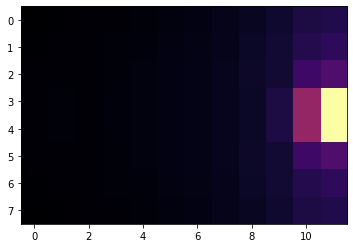

In [4]:
plt.imshow(xtd, cmap="inferno");

In [18]:
pass_df = pd.read_csv("all_successful_passes.csv")    #replace this with your own csv file, with the below mentioned format

In [19]:
pass_df.tail()

,minute,second,x,y,endX,endY,outcome,team,playerid,player
937,93,40,45.5,66.0,54.7,79.4,Successful,30,69933,Toby Alderweireld
938,93,49,28.8,2.5,22.4,13.4,Successful,19,82877,Luke Ayling
939,93,52,23.7,26.5,13.8,29.5,Successful,19,317896,Jack Harrison
940,93,53,13.8,29.5,18.4,7.1,Successful,19,123232,Diego Llorente
941,93,57,26.6,9.5,32.3,13.6,Successful,19,82877,Luke Ayling


In [20]:
pass_df['x_bin'] = pass_df.x.apply(lambda val: int(val/(100/n_cols)) if val != 100 else int(val/(100/n_cols)) - 1 )
pass_df['endX_bin'] = pass_df.endX.apply(lambda val: int(val/(100/n_cols)) if val != 100 else int(val/(100/n_cols)) - 1 )

pass_df['y_bin'] = pass_df.y.apply(lambda val: int(val/(100/n_rows)) if val != 100 else int(val/(100/n_rows)) - 1 )
pass_df['endY_bin'] = pass_df.endY.apply(lambda val: int(val/(100/n_rows)) if val != 100 else int(val/(100/n_rows)) - 1 )

In [21]:
pass_df.head()

,minute,second,x,y,endX,endY,outcome,team,playerid,player,x_bin,endX_bin,y_bin,endY_bin
0,0,0,49.9,50.3,46.0,47.4,Successful,19,109670,Patrick Bamford,5,5,4,3
1,0,1,45.8,46.9,29.8,55.2,Successful,19,280771,Tyler Roberts,5,3,3,4
2,0,3,30.2,51.8,23.6,30.8,Successful,19,276205,Robin Koch,3,2,4,2
3,0,5,23.5,28.4,27.4,6.4,Successful,19,123232,Diego Llorente,2,3,2,0
4,0,7,27.5,5.3,42.9,7.9,Unsuccessful,19,82877,Luke Ayling,3,5,0,0


In [22]:

pass_df['start_zone_value'] = pass_df[['x_bin', 'y_bin']].apply(lambda x: xtd[x[1]][x[0]], axis=1)
pass_df['end_zone_value'] = pass_df[['endX_bin', 'endY_bin']].apply(lambda x: xtd[x[1]][x[0]], axis=1)

In [23]:
pass_df.head()

,minute,second,x,y,endX,endY,outcome,team,playerid,player,x_bin,endX_bin,y_bin,endY_bin,start_zone_value,end_zone_value
0,0,0,49.9,50.3,46.0,47.4,Successful,19,109670,Patrick Bamford,5,5,4,3,0.014846,0.014846
1,0,1,45.8,46.9,29.8,55.2,Successful,19,280771,Tyler Roberts,5,3,3,4,0.014846,0.011324
2,0,3,30.2,51.8,23.6,30.8,Successful,19,276205,Robin Koch,3,2,4,2,0.011324,0.010013
3,0,5,23.5,28.4,27.4,6.4,Successful,19,123232,Diego Llorente,2,3,2,0,0.010013,0.009777
4,0,7,27.5,5.3,42.9,7.9,Unsuccessful,19,82877,Luke Ayling,3,5,0,0,0.009777,0.012483


In [24]:
pass_df['pass_xt_value'] = pass_df['end_zone_value'] - pass_df['start_zone_value'] ##value of any pass is just value at end_zone - value at start_zone
pass_df = pass_df[[col for col in pass_df.columns if 'bin' not in col]] ##remove the bins/indices since they're useless now

In [25]:
pass_df.head()

,minute,second,x,y,endX,endY,outcome,team,playerid,player,start_zone_value,end_zone_value,pass_xt_value
0,0,0,49.9,50.3,46.0,47.4,Successful,19,109670,Patrick Bamford,0.014846,0.014846,0.000000
1,0,1,45.8,46.9,29.8,55.2,Successful,19,280771,Tyler Roberts,0.014846,0.011324,-0.003522
2,0,3,30.2,51.8,23.6,30.8,Successful,19,276205,Robin Koch,0.011324,0.010013,-0.001311
3,0,5,23.5,28.4,27.4,6.4,Successful,19,123232,Diego Llorente,0.010013,0.009777,-0.000236
4,0,7,27.5,5.3,42.9,7.9,Unsuccessful,19,82877,Luke Ayling,0.009777,0.012483,0.002707


In [27]:
#pass_df.to_csv('LS_xT.csv')

In [26]:
#df = pd.read_csv("LS_xT.csv")
df = pass_df
df.head()

,minute,second,x,y,endX,endY,outcome,team,playerid,player,start_zone_value,end_zone_value,pass_xt_value
0,0,0,49.9,50.3,46.0,47.4,Successful,19,109670,Patrick Bamford,0.014846,0.014846,0.000000
1,0,1,45.8,46.9,29.8,55.2,Successful,19,280771,Tyler Roberts,0.014846,0.011324,-0.003522
2,0,3,30.2,51.8,23.6,30.8,Successful,19,276205,Robin Koch,0.011324,0.010013,-0.001311
3,0,5,23.5,28.4,27.4,6.4,Successful,19,123232,Diego Llorente,0.010013,0.009777,-0.000236
4,0,7,27.5,5.3,42.9,7.9,Unsuccessful,19,82877,Luke Ayling,0.009777,0.012483,0.002707


In [43]:
df_leeds = df[(df['team'] == 19)]
df_leeds

,minute,second,x,y,endX,endY,outcome,team,playerid,player,start_zone_value,end_zone_value,pass_xt_value
0,0,0,49.9,50.3,46.0,47.4,Successful,19,109670,Patrick Bamford,0.014846,0.014846,0.000000
1,0,1,45.8,46.9,29.8,55.2,Successful,19,280771,Tyler Roberts,0.014846,0.011324,-0.003522
2,0,3,30.2,51.8,23.6,30.8,Successful,19,276205,Robin Koch,0.011324,0.010013,-0.001311
3,0,5,23.5,28.4,27.4,6.4,Successful,19,123232,Diego Llorente,0.010013,0.009777,-0.000236
4,0,7,27.5,5.3,42.9,7.9,Unsuccessful,19,82877,Luke Ayling,0.009777,0.012483,0.002707
...,...,...,...,...,...,...,...,...,...,...,...,...,...
932,93,15,7.4,23.9,43.5,7.3,Unsuccessful,19,123232,Diego Llorente,0.007501,0.012483,0.004983
938,93,49,28.8,2.5,22.4,13.4,Successful,19,82877,Luke Ayling,0.009777,0.009424,-0.000353
939,93,52,23.7,26.5,13.8,29.5,Successful,19,317896,Jack Harrison,0.010013,0.009777,-0.000236
940,93,53,13.8,29.5,18.4,7.1,Successful,19,123232,Diego Llorente,0.009777,0.008449,-0.001329


In [53]:
df_spurs = df[(df['team'] == 30)]
df_spurs

,minute,second,x,y,endX,endY,outcome,team,playerid,player,start_zone_value,end_zone_value,pass_xt_value
5,0,10,57.0,88.2,57.8,85.7,Unsuccessful,30,362275,Sergio Reguilón,0.014736,0.016118,0.001382
6,0,11,65.6,66.0,61.3,68.1,Unsuccessful,30,83532,Harry Kane,0.019351,0.019351,0.000000
9,0,18,34.6,80.9,49.6,81.5,Successful,30,117973,Eric Dier,0.012147,0.013845,0.001698
10,0,20,49.3,84.9,51.0,94.6,Unsuccessful,30,303908,Giovani Lo Celso,0.013845,0.014736,0.000891
11,0,34,55.0,100.0,64.1,87.1,Successful,30,362275,Sergio Reguilón,0.014736,0.018703,0.003968
...,...,...,...,...,...,...,...,...,...,...,...,...,...
933,93,26,38.2,100.0,18.4,80.4,Successful,30,69933,Toby Alderweireld,0.011263,0.009424,-0.001839
934,93,34,21.2,72.3,24.6,50.7,Successful,30,321389,Tanguy Ndombele,0.010013,0.010165,0.000152
935,93,36,25.0,47.5,30.2,44.9,Successful,30,101859,Pierre-Emile Højbjerg,0.011324,0.011324,0.000000
936,93,37,30.6,42.4,48.4,57.6,Successful,30,75830,Erik Lamela,0.011324,0.014846,0.003522


In [56]:
data_pov_spurs = df_spurs[df_spurs['pass_xt_value'] > 0]


data_pov_spurs['Time'] = ((data_pov_spurs['minute'])*60 + data_pov_spurs['second'])/60
data_pov_spurs

<ipython-input-56-a03073a607a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pov_spurs['Time'] = ((data_pov_spurs['minute'])*60 + data_pov_spurs['second'])/60


,minute,second,x,y,endX,endY,outcome,team,playerid,player,start_zone_value,end_zone_value,pass_xt_value,Time
5,0,10,57.0,88.2,57.8,85.7,Unsuccessful,30,362275,Sergio Reguilón,0.014736,0.016118,0.001382,0.166667
9,0,18,34.6,80.9,49.6,81.5,Successful,30,117973,Eric Dier,0.012147,0.013845,0.001698,0.300000
10,0,20,49.3,84.9,51.0,94.6,Unsuccessful,30,303908,Giovani Lo Celso,0.013845,0.014736,0.000891,0.333333
11,0,34,55.0,100.0,64.1,87.1,Successful,30,362275,Sergio Reguilón,0.014736,0.018703,0.003968,0.566667
17,0,46,7.6,49.1,9.4,39.8,Successful,30,25604,Hugo Lloris,0.009411,0.010827,0.001417,0.766667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
928,92,28,42.9,84.8,59.1,35.5,Unsuccessful,30,362275,Sergio Reguilón,0.013845,0.019351,0.005506,92.466667
929,92,37,70.1,24.7,90.2,16.1,Successful,30,92508,Lucas Moura,0.024015,0.040670,0.016655,92.616667
934,93,34,21.2,72.3,24.6,50.7,Successful,30,321389,Tanguy Ndombele,0.010013,0.010165,0.000152,93.566667
936,93,37,30.6,42.4,48.4,57.6,Successful,30,75830,Erik Lamela,0.011324,0.014846,0.003522,93.616667


In [57]:
data_pov_leeds = df_leeds[df_leeds['pass_xt_value'] > 0]

data_pov_leeds['Time'] = ((data_pov_leeds['minute'])*60 + data_pov_leeds['second'])/60
data_pov_leeds

<ipython-input-57-c7a783b85fe3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pov_leeds['Time'] = ((data_pov_leeds['minute'])*60 + data_pov_leeds['second'])/60


,minute,second,x,y,endX,endY,outcome,team,playerid,player,start_zone_value,end_zone_value,pass_xt_value,Time
4,0,7,27.5,5.3,42.9,7.9,Unsuccessful,19,82877,Luke Ayling,0.009777,0.012483,0.002707,0.116667
8,0,16,33.0,3.4,43.4,5.8,Unsuccessful,19,134143,Stuart Dallas,0.009777,0.012483,0.002707,0.266667
20,0,54,73.5,100.0,87.3,92.7,Successful,19,137161,Ezgjan Alioski,0.021221,0.034851,0.013629,0.900000
25,1,13,24.4,79.4,9.7,46.9,Successful,19,276205,Robin Koch,0.009424,0.010827,0.001403,1.216667
27,1,18,13.7,15.5,10.9,46.1,Successful,19,82877,Luke Ayling,0.008786,0.010827,0.002041,1.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
920,91,19,79.8,15.1,89.7,40.4,Unsuccessful,19,270446,Kalvin Phillips,0.029533,0.108051,0.078518,91.316667
925,92,20,4.9,42.4,61.0,24.8,Successful,19,380580,Illan Meslier,0.009411,0.018703,0.009293,92.333333
927,92,26,47.6,16.9,58.0,19.4,Unsuccessful,19,82877,Luke Ayling,0.013845,0.016118,0.002273,92.433333
932,93,15,7.4,23.9,43.5,7.3,Unsuccessful,19,123232,Diego Llorente,0.007501,0.012483,0.004983,93.250000


In [58]:
aggregation_functions = {'pass_xt_value': 'mean', 'Time': 'first'}
df_new_spurs = data_pov_spurs.groupby(data_pov_spurs['Time']).aggregate(aggregation_functions)

df_new_spurs

,pass_xt_value,Time
Time,,
0.166667,0.001382,0.166667
0.300000,0.001698,0.300000
0.333333,0.000891,0.333333
0.566667,0.003968,0.566667
0.766667,0.001417,0.766667
...,...,...
92.466667,0.005506,92.466667
92.616667,0.016655,92.616667
93.566667,0.000152,93.566667


In [59]:
aggregation_functions = {'pass_xt_value': 'mean', 'Time': 'first'}
df_new_leeds = data_pov_leeds.groupby(data_pov_leeds['Time']).aggregate(aggregation_functions)

df_new_leeds

,pass_xt_value,Time
Time,,
0.116667,0.002707,0.116667
0.266667,0.002707,0.266667
0.900000,0.013629,0.900000
1.216667,0.001403,1.216667
1.300000,0.002041,1.300000
...,...,...
91.316667,0.078518,91.316667
92.333333,0.009293,92.333333
92.433333,0.002273,92.433333


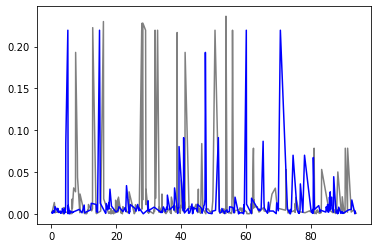

In [61]:
plt.plot(df_new_leeds.Time,df_new_leeds.pass_xt_value,color='grey')

plt.plot(df_new_spurs.Time,df_new_spurs.pass_xt_value,color='blue')

In [62]:
bins = [0, 5, 10,15, 20,25, 30,35, 40,45, 50,55, 60,65,70,75,80,85,90,95,100]
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
#count_spurs = [10,22,16,22,10,14,16,26,18,3]


df_new_leeds['binned'] = pd.cut(df_new_leeds['Time'], bins=bins,labels=labels)

df_new_leeds

,pass_xt_value,Time,binned
Time,,,
0.116667,0.002707,0.116667,1
0.266667,0.002707,0.266667,1
0.900000,0.013629,0.900000,1
1.216667,0.001403,1.216667,1
1.300000,0.002041,1.300000,1
...,...,...,...
91.316667,0.078518,91.316667,19
92.333333,0.009293,92.333333,19
92.433333,0.002273,92.433333,19


In [63]:
bins = [0, 5, 10,15, 20,25, 30,35, 40,45, 50,55, 60,65,70,75,80,85,90,95,100]
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]
#count_spurs = [10,22,16,22,10,14,16,26,18,3]


df_new_spurs['binned'] = pd.cut(df_new_spurs['Time'], bins=bins,labels=labels)

df_new_spurs

,pass_xt_value,Time,binned
Time,,,
0.166667,0.001382,0.166667,1
0.300000,0.001698,0.300000,1
0.333333,0.000891,0.333333,1
0.566667,0.003968,0.566667,1
0.766667,0.001417,0.766667,1
...,...,...,...
92.466667,0.005506,92.466667,19
92.616667,0.016655,92.616667,19
93.566667,0.000152,93.566667,19


In [70]:
counter_spurs = [0,]

for x in labels:
    counter_spurs.append(df_new_spurs.loc[df_new_spurs['binned'] == x, 'pass_xt_value'].sum())
    
print(df_new_spurs['pass_xt_value'].sum())

3.03381536


In [85]:
print(counter_spurs)

[0, 0.15727096000000002, 0.25184511000000004, 0.27723858, 0.10389917, 0.08826034999999999, 0.06263287999999999, 0.03755996, 0.18991627, 0.14783994, 0.27466198000000003, 0.13797968, 0.07170514, 0.27051099999999995, 0.14675579999999996, 0.32388696, 0.1277168, 0.11818078000000001, 0.21354376, 0.03241023999999999, 0.0]


In [76]:
counter_leeds = [0,]

for x in labels:
    counter_leeds.append(df_new_leeds.loc[df_new_leeds['binned'] == x, 'pass_xt_value'].sum())
    
print(df_new_leeds['pass_xt_value'].sum())

5.301825975


In [77]:
print(counter_leeds)

[0, 0.0438588, 0.4187589499999999, 0.26416828000000003, 0.29893687999999996, 0.14195215, 0.9968096399999999, 0.5472596399999998, 0.32409149, 0.30828604999999987, 0.22216468, 0.48806864999999994, 0.29752192999999993, 0.22122614000000002, 0.07444483, 0.08909046000000001, 0.065859005, 0.17955275999999998, 0.13394557999999998, 0.18583006, 0.0]


In [90]:
xt_diff = [x1 - x2 for (x1, x2) in zip(counter_leeds, counter_spurs)]

xt_diff


[0,
 -0.11341216000000001,
 0.16691383999999987,
 -0.01307029999999998,
 0.19503770999999998,
 0.05369180000000001,
 0.9341767599999999,
 0.5096996799999998,
 0.13417521999999998,
 0.16044610999999986,
 -0.052497300000000025,
 0.35008896999999994,
 0.22581678999999993,
 -0.04928485999999993,
 -0.07231096999999996,
 -0.2347965,
 -0.06185779499999999,
 0.061371979999999965,
 -0.07959818000000002,
 0.15341981999999998,
 0.0]

In [131]:
minute_bins = [0, 5, 10,15, 20,25, 30,35, 40,45, 50,55, 60,65,70,75,80,85,90,95,100]

dict = {'minute' : minute_bins, 'xt' : xt_diff} 

df_xt = pd.DataFrame(dict)


df_xt['avg'] = df_xt['xt'].rolling(window=2).mean()

df_xt


,minute,xt,avg
0,0,0.000000,NaN
1,5,-0.113412,-0.056706
2,10,0.166914,0.026751
3,15,-0.013070,0.076922
4,20,0.195038,0.090984
5,25,0.053692,0.124365
6,30,0.934177,0.493934
7,35,0.509700,0.721938
8,40,0.134175,0.321937
9,45,0.160446,0.147311


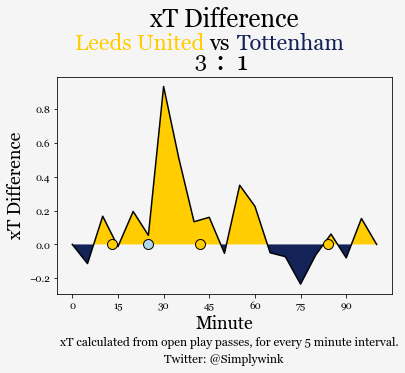

In [196]:
import matplotlib.pyplot as plt

hfont = {'fontname':'Georgia'}


fig = plt.figure()

fig.set(facecolor = "#f5f5f5")

plt.rcParams['axes.facecolor'] = '#f5f5f5'



plt.plot(df_xt.minute,df_xt.xt,color='#010203')

my_xticks = [0,15,30,45,60,75,90]
plt.xticks(my_xticks,**hfont)
plt.yticks(**hfont)


plt.title("xT Difference",**hfont,color="#010203",size=25,y=1.2)

plt.text(1,1.15,'Leeds United',**hfont,color="#FFCD00",size=22)
plt.text(45,1.15,'vs',**hfont,color="black",size=22)
plt.text(54,1.15,'Tottenham',**hfont,color="#132257",size=22)


plt.text(40,1.05,'3',**hfont,color="#010203",size=22)

plt.text(47,1.03,':',**hfont,color="#010203",size=29)

plt.text(54,1.03,'1',**hfont,color="#010203",size=25)


plt.ylabel('xT Difference', fontsize=18,**hfont)
plt.xlabel('Minute', fontsize=18,**hfont)

plt.fill_between(df_xt.minute, df_xt.xt, 0, where=0 >= df_xt.xt,
                 facecolor='#132257', interpolate=True)
plt.fill_between(df_xt.minute, df_xt.xt, 0, where=0 <= df_xt.xt,
                 facecolor='#FFCD00', interpolate=True)

plt.text(-4,-0.6, "xT calculated from open play passes, for every 5 minute interval.",**hfont,color="#010203",size=12)

plt.text(30,-0.7, "Twitter: @Simplywink",**hfont,color="#010203",size=12)


plt.plot(13, 0, 'o', color='#FFCD00',ms=10,markeredgecolor='black')
plt.plot(42, 0, 'o', color='#FFCD00',ms=10,markeredgecolor='black')
plt.plot(84, 0, 'o', color='#FFCD00',ms=10,markeredgecolor='black')


plt.plot(25, -0, 'o', color ='#ADD8E6' ,ms=10,markeredgecolor='black')


#plt.savefig('xt.png',dpi=720,bbox_inches='tight')

plt.show()
